In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

In [2]:
import sys
sys.path.append('../src')
from model.proba_model import get_past_meta, predict
from model.evaluation import get_classification_report

In [3]:
import sys
sys.path.append('../src')
from data.data_split import split_data_by_year
from features.contigency_table import create_contigency_table
from model.proba_model import get_past_meta, predict
from model.evaluation import get_classification_report

In [4]:
# ### Definitions
path_data_dir = '../data/'

list_assets = ["PETR3.SA","PRIO3.SA", "VALE3.SA", "GGBR3.SA", "ABCB4.SA", "ITUB3.SA", "FLRY3.SA", "RADL3.SA"]

relevant_cols = ['Date', 'Close', 'Volume']

In [5]:
def get_probability(past_meta_list, possible_metas, asset):
    
    dict_probas = {}
    
    for p_meta in possible_metas:
        
        list_probas_meta = []
        
 
        for i, past_meta in enumerate(past_meta_list):
            
            meta_idx = i + 1
            
            path_data = path_data_dir + f"processed/train_contingency_table_ind_price_history_{asset.replace('.', '_')}_meta_-{meta_idx}_dataset_ffill.csv"
        
            cont_tbl_train = pd.read_csv(path_data, index_col = 0)
            
            df_probas = cont_tbl_train.apply(lambda x: [col/sum(x) for col in x])   
            
            proba = df_probas.loc[p_meta, past_meta]
            
            list_probas_meta.append(proba)
            
        dict_probas.update({p_meta: {'probas':list_probas_meta, "prod": np.product(list_probas_meta)}})
        
    return dict_probas
        
        

In [6]:
df_results = pd.DataFrame({})

for n_prev_meta in range(2, 6):

    for asset in list_assets:
        
        print(f"""
######################################
# asset: {asset} | meta: {n_prev_meta}
######################################""")
        
        # get train dataset
        train_dataset = pd.read_csv(path_data_dir + f"processed/train_price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv", index_col= 0).reset_index(drop=True)
        # get test dataset
        test_dataset = pd.read_csv(path_data_dir + f"processed/test_price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv", index_col= 0).reset_index(drop=True)
        
        # get the past meta for all days    
        test_dataset["past_meta"] = test_dataset.apply(lambda x: get_past_meta(test_dataset,x,n_prev_meta,name_meta_col = "meta"), axis=1)
        
        # remove the first rows
        test_dataset = test_dataset.iloc[n_prev_meta:]
                
        possible_metas = train_dataset.meta.unique().tolist()
        
        test_dataset['dict_probas'] = test_dataset.past_meta.progress_apply(lambda x: get_probability(list(x), possible_metas, asset))
        
        test_dataset['most_likely_meta'] = test_dataset.dict_probas.progress_apply(lambda row: max(row, key=lambda x: row[x]['prod']))
        
        # create df with results
        df_results_p = get_classification_report(test_dataset['meta'], test_dataset['most_likely_meta'])
        df_results_p['asset'] = asset
        df_results_p['n_prev_meta'] = n_prev_meta
        
        df_results = pd.concat([df_results, df_results_p])
        
        print(classification_report(test_dataset['meta'], test_dataset['most_likely_meta']))        


######################################
# asset: PETR3.SA | meta: 2
######################################


100%|██████████| 977/977 [00:00<00:00, 338049.41it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         3
          -2       0.55      0.34      0.42        32
          -1       0.76      0.69      0.72       175
           0       0.76      0.87      0.81       464
           1       0.77      0.71      0.74       238
           2       0.67      0.47      0.55        62
           3       0.00      0.00      0.00         3

    accuracy                           0.75       977
   macro avg       0.50      0.44      0.46       977
weighted avg       0.74      0.75      0.74       977


######################################
# asset: PRIO3.SA | meta: 2
######################################


100%|██████████| 977/977 [00:00<00:00, 176076.78it/s]


              precision    recall  f1-score   support

          -2       0.69      0.49      0.57        37
          -1       0.70      0.60      0.65       131
           0       0.75      0.87      0.81       458
           1       0.75      0.70      0.73       274
           2       0.67      0.45      0.54        77

    accuracy                           0.74       977
   macro avg       0.71      0.62      0.66       977
weighted avg       0.74      0.74      0.73       977


######################################
# asset: VALE3.SA | meta: 2
######################################


100%|██████████| 977/977 [00:00<00:00, 189714.58it/s]


              precision    recall  f1-score   support

          -3       0.50      0.29      0.36         7
          -2       0.68      0.53      0.60        77
          -1       0.72      0.65      0.69       225
           0       0.76      0.87      0.81       445
           1       0.74      0.69      0.72       170
           2       0.71      0.55      0.62        49
           3       0.00      0.00      0.00         4

    accuracy                           0.74       977
   macro avg       0.59      0.51      0.54       977
weighted avg       0.73      0.74      0.73       977


######################################
# asset: GGBR3.SA | meta: 2
######################################


100%|██████████| 977/977 [00:00<00:00, 285265.23it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         7
          -2       0.70      0.54      0.61        59
          -1       0.69      0.60      0.64       179
           0       0.76      0.88      0.82       485
           1       0.77      0.69      0.72       195
           2       0.62      0.47      0.53        49
           3       0.00      0.00      0.00         3

    accuracy                           0.74       977
   macro avg       0.50      0.46      0.48       977
weighted avg       0.73      0.74      0.73       977


######################################
# asset: ABCB4.SA | meta: 2
######################################


100%|██████████| 977/977 [00:00<00:00, 176592.76it/s]


              precision    recall  f1-score   support

          -2       0.68      0.42      0.52        31
          -1       0.70      0.55      0.62       149
           0       0.73      0.87      0.79       493
           1       0.68      0.62      0.65       232
           2       0.64      0.39      0.49        71
           3       0.00      0.00      0.00         1

    accuracy                           0.71       977
   macro avg       0.57      0.48      0.51       977
weighted avg       0.71      0.71      0.70       977


######################################
# asset: ITUB3.SA | meta: 2
######################################


100%|██████████| 977/977 [00:00<00:00, 159417.82it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         1
          -2       0.73      0.54      0.62        59
          -1       0.75      0.67      0.71       210
           0       0.74      0.86      0.79       414
           1       0.75      0.71      0.73       236
           2       0.62      0.42      0.50        55
           3       0.00      0.00      0.00         2

    accuracy                           0.74       977
   macro avg       0.51      0.46      0.48       977
weighted avg       0.73      0.74      0.73       977


######################################
# asset: FLRY3.SA | meta: 2
######################################


100%|██████████| 977/977 [00:00<00:00, 309317.26it/s]


              precision    recall  f1-score   support

          -2       0.63      0.40      0.49        60
          -1       0.70      0.61      0.65       263
           0       0.73      0.87      0.79       453
           1       0.74      0.64      0.69       168
           2       0.59      0.43      0.50        30
           3       0.00      0.00      0.00         3

    accuracy                           0.72       977
   macro avg       0.56      0.49      0.52       977
weighted avg       0.71      0.72      0.71       977


######################################
# asset: RADL3.SA | meta: 2
######################################


100%|██████████| 977/977 [00:00<00:00, 334053.56it/s]


              precision    recall  f1-score   support

          -2       0.78      0.56      0.65        50
          -1       0.75      0.66      0.70       180
           0       0.73      0.86      0.79       452
           1       0.76      0.67      0.71       263
           2       0.58      0.37      0.45        30
           3       0.00      0.00      0.00         2

    accuracy                           0.74       977
   macro avg       0.60      0.52      0.55       977
weighted avg       0.74      0.74      0.73       977


######################################
# asset: PETR3.SA | meta: 3
######################################


100%|██████████| 976/976 [00:00<00:00, 314580.86it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         3
          -2       0.33      0.03      0.06        32
          -1       0.63      0.67      0.65       175
           0       0.72      0.79      0.75       464
           1       0.63      0.73      0.68       237
           2       0.20      0.02      0.03        62
           3       0.00      0.00      0.00         3

    accuracy                           0.67       976
   macro avg       0.36      0.32      0.31       976
weighted avg       0.63      0.67      0.64       976


######################################
# asset: PRIO3.SA | meta: 3
######################################


100%|██████████| 976/976 [00:00<00:00, 280290.36it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        37
          -1       0.53      0.59      0.56       130
           0       0.69      0.78      0.73       458
           1       0.65      0.65      0.65       274
           2       0.59      0.29      0.39        77

    accuracy                           0.65       976
   macro avg       0.49      0.46      0.46       976
weighted avg       0.62      0.65      0.63       976


######################################
# asset: VALE3.SA | meta: 3
######################################


100%|██████████| 976/976 [00:00<00:00, 194916.71it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         7
          -2       0.33      0.04      0.07        77
          -1       0.57      0.67      0.62       224
           0       0.70      0.79      0.74       445
           1       0.61      0.62      0.62       170
           2       0.68      0.39      0.49        49
           3       0.00      0.00      0.00         4

    accuracy                           0.64       976
   macro avg       0.41      0.36      0.36       976
weighted avg       0.62      0.64      0.62       976


######################################
# asset: GGBR3.SA | meta: 3
######################################


100%|██████████| 976/976 [00:00<00:00, 186066.12it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         7
          -2       0.71      0.08      0.15        59
          -1       0.54      0.61      0.57       179
           0       0.72      0.80      0.76       484
           1       0.60      0.68      0.64       195
           2       0.60      0.06      0.11        49
           3       0.00      0.00      0.00         3

    accuracy                           0.66       976
   macro avg       0.45      0.32      0.32       976
weighted avg       0.65      0.66      0.63       976


######################################
# asset: ABCB4.SA | meta: 3
######################################


100%|██████████| 976/976 [00:00<00:00, 361692.94it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        31
          -1       0.55      0.54      0.54       149
           0       0.69      0.78      0.74       493
           1       0.56      0.60      0.58       231
           2       0.55      0.23      0.32        71
           3       0.00      0.00      0.00         1

    accuracy                           0.64       976
   macro avg       0.39      0.36      0.36       976
weighted avg       0.61      0.64      0.62       976


######################################
# asset: ITUB3.SA | meta: 3
######################################


100%|██████████| 976/976 [00:00<00:00, 153136.34it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         1
          -2       0.00      0.00      0.00        59
          -1       0.59      0.65      0.62       210
           0       0.66      0.76      0.70       413
           1       0.66      0.68      0.67       236
           2       0.65      0.27      0.38        55
           3       0.00      0.00      0.00         2

    accuracy                           0.64       976
   macro avg       0.36      0.34      0.34       976
weighted avg       0.60      0.64      0.61       976


######################################
# asset: FLRY3.SA | meta: 3
######################################


100%|██████████| 976/976 [00:00<00:00, 317459.54it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        60
          -1       0.59      0.60      0.59       263
           0       0.67      0.79      0.72       452
           1       0.63      0.62      0.62       168
           2       0.75      0.10      0.18        30
           3       0.00      0.00      0.00         3

    accuracy                           0.64       976
   macro avg       0.44      0.35      0.35       976
weighted avg       0.60      0.64      0.61       976


######################################
# asset: RADL3.SA | meta: 3
######################################


100%|██████████| 976/976 [00:00<00:00, 273291.99it/s]


              precision    recall  f1-score   support

          -2       0.75      0.42      0.54        50
          -1       0.63      0.58      0.60       180
           0       0.66      0.76      0.71       451
           1       0.66      0.63      0.64       263
           2       0.50      0.20      0.29        30
           3       0.00      0.00      0.00         2

    accuracy                           0.66       976
   macro avg       0.53      0.43      0.46       976
weighted avg       0.65      0.66      0.65       976


######################################
# asset: PETR3.SA | meta: 4
######################################


100%|██████████| 975/975 [00:00<00:00, 340106.99it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         3
          -2       0.00      0.00      0.00        32
          -1       0.59      0.58      0.58       175
           0       0.68      0.80      0.74       464
           1       0.64      0.67      0.65       236
           2       0.20      0.02      0.03        62
           3       0.00      0.00      0.00         3

    accuracy                           0.65       975
   macro avg       0.30      0.30      0.29       975
weighted avg       0.60      0.65      0.62       975


######################################
# asset: PRIO3.SA | meta: 4
######################################


100%|██████████| 975/975 [00:00<00:00, 338334.28it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        37
          -1       0.51      0.50      0.51       129
           0       0.66      0.79      0.72       458
           1       0.65      0.66      0.65       274
           2       0.55      0.16      0.24        77

    accuracy                           0.63       975
   macro avg       0.47      0.42      0.42       975
weighted avg       0.60      0.63      0.61       975


######################################
# asset: VALE3.SA | meta: 4
######################################


100%|██████████| 975/975 [00:00<00:00, 363506.35it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         7
          -2       0.44      0.05      0.09        77
          -1       0.56      0.61      0.58       223
           0       0.66      0.80      0.72       445
           1       0.58      0.62      0.60       170
           2       0.75      0.06      0.11        49
           3       0.00      0.00      0.00         4

    accuracy                           0.62       975
   macro avg       0.43      0.31      0.30       975
weighted avg       0.60      0.62      0.58       975


######################################
# asset: GGBR3.SA | meta: 4
######################################


100%|██████████| 975/975 [00:00<00:00, 242151.02it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         7
          -2       0.67      0.07      0.12        58
          -1       0.52      0.56      0.54       179
           0       0.68      0.80      0.74       484
           1       0.58      0.60      0.59       195
           2       0.75      0.06      0.11        49
           3       0.00      0.00      0.00         3

    accuracy                           0.63       975
   macro avg       0.46      0.30      0.30       975
weighted avg       0.63      0.63      0.60       975


######################################
# asset: ABCB4.SA | meta: 4
######################################


100%|██████████| 975/975 [00:00<00:00, 182907.52it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        31
          -1       0.57      0.46      0.51       149
           0       0.66      0.82      0.73       492
           1       0.57      0.56      0.56       231
           2       0.39      0.10      0.16        71
           3       0.00      0.00      0.00         1

    accuracy                           0.62       975
   macro avg       0.36      0.32      0.33       975
weighted avg       0.58      0.62      0.59       975


######################################
# asset: ITUB3.SA | meta: 4
######################################


100%|██████████| 975/975 [00:00<00:00, 300142.86it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         1
          -2       0.00      0.00      0.00        59
          -1       0.59      0.61      0.60       210
           0       0.62      0.77      0.69       412
           1       0.62      0.64      0.63       236
           2       0.00      0.00      0.00        55
           3       0.00      0.00      0.00         2

    accuracy                           0.61       975
   macro avg       0.26      0.29      0.27       975
weighted avg       0.54      0.61      0.57       975


######################################
# asset: FLRY3.SA | meta: 4
######################################


100%|██████████| 975/975 [00:00<00:00, 305547.40it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        60
          -1       0.61      0.60      0.61       263
           0       0.65      0.81      0.72       451
           1       0.64      0.58      0.61       168
           2       1.00      0.10      0.18        30
           3       0.00      0.00      0.00         3

    accuracy                           0.64       975
   macro avg       0.48      0.35      0.35       975
weighted avg       0.61      0.64      0.61       975


######################################
# asset: RADL3.SA | meta: 4
######################################


100%|██████████| 975/975 [00:00<00:00, 306210.89it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        50
          -1       0.56      0.54      0.55       180
           0       0.63      0.78      0.69       450
           1       0.64      0.57      0.61       263
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00         2

    accuracy                           0.62       975
   macro avg       0.30      0.32      0.31       975
weighted avg       0.57      0.62      0.59       975


######################################
# asset: PETR3.SA | meta: 5
######################################


100%|██████████| 974/974 [00:00<00:00, 367908.15it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         3
          -2       0.00      0.00      0.00        32
          -1       0.52      0.50      0.51       175
           0       0.65      0.74      0.69       463
           1       0.59      0.67      0.62       236
           2       0.20      0.02      0.03        62
           3       0.00      0.00      0.00         3

    accuracy                           0.60       974
   macro avg       0.28      0.28      0.27       974
weighted avg       0.56      0.60      0.57       974


######################################
# asset: PRIO3.SA | meta: 5
######################################


100%|██████████| 974/974 [00:00<00:00, 264623.14it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        37
          -1       0.48      0.52      0.50       128
           0       0.63      0.77      0.69       458
           1       0.62      0.64      0.63       274
           2       0.00      0.00      0.00        77

    accuracy                           0.61       974
   macro avg       0.35      0.38      0.36       974
weighted avg       0.54      0.61      0.57       974


######################################
# asset: VALE3.SA | meta: 5
######################################


100%|██████████| 974/974 [00:00<00:00, 279047.27it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         7
          -2       0.14      0.01      0.02        77
          -1       0.51      0.55      0.53       222
           0       0.60      0.73      0.66       445
           1       0.54      0.58      0.56       170
           2       1.00      0.02      0.04        49
           3       0.00      0.00      0.00         4

    accuracy                           0.56       974
   macro avg       0.40      0.27      0.26       974
weighted avg       0.55      0.56      0.52       974


######################################
# asset: GGBR3.SA | meta: 5
######################################


100%|██████████| 974/974 [00:00<00:00, 222278.26it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         6
          -2       0.40      0.03      0.06        58
          -1       0.51      0.56      0.53       179
           0       0.66      0.78      0.72       484
           1       0.54      0.55      0.54       195
           2       0.75      0.06      0.11        49
           3       0.00      0.00      0.00         3

    accuracy                           0.60       974
   macro avg       0.41      0.28      0.28       974
weighted avg       0.59      0.60      0.57       974


######################################
# asset: ABCB4.SA | meta: 5
######################################


100%|██████████| 974/974 [00:00<00:00, 197555.59it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        31
          -1       0.53      0.42      0.47       148
           0       0.63      0.79      0.70       492
           1       0.53      0.55      0.54       231
           2       1.00      0.01      0.03        71
           3       0.00      0.00      0.00         1

    accuracy                           0.59       974
   macro avg       0.45      0.30      0.29       974
weighted avg       0.60      0.59      0.56       974


######################################
# asset: ITUB3.SA | meta: 5
######################################


100%|██████████| 974/974 [00:00<00:00, 337401.07it/s]


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         1
          -2       0.00      0.00      0.00        59
          -1       0.61      0.57      0.59       210
           0       0.58      0.75      0.65       411
           1       0.58      0.60      0.59       236
           2       0.00      0.00      0.00        55
           3       0.00      0.00      0.00         2

    accuracy                           0.59       974
   macro avg       0.25      0.27      0.26       974
weighted avg       0.52      0.59      0.55       974


######################################
# asset: FLRY3.SA | meta: 5
######################################


100%|██████████| 974/974 [00:00<00:00, 175310.14it/s]


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        60
          -1       0.61      0.54      0.57       262
           0       0.62      0.83      0.71       451
           1       0.66      0.55      0.60       168
           2       1.00      0.10      0.18        30
           3       0.00      0.00      0.00         3

    accuracy                           0.63       974
   macro avg       0.48      0.34      0.34       974
weighted avg       0.60      0.63      0.59       974


######################################
# asset: RADL3.SA | meta: 5
######################################


100%|██████████| 974/974 [00:00<00:00, 323917.86it/s]

              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        50
          -1       0.56      0.48      0.52       179
           0       0.58      0.76      0.66       450
           1       0.57      0.51      0.54       263
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00         2

    accuracy                           0.57       974
   macro avg       0.29      0.29      0.29       974
weighted avg       0.53      0.57      0.54       974



In [7]:
test_dataset

,Date,Close,Volume,SMA_21,MSTD_21,Day_of_week,Weekend,Invalid_Days,diff_close_mean,diff_close_mean_z_score,meta,past_meta,dict_probas,most_likely_meta
5,2021-08-18,24.326923,5589168.0,24.930861,0.480737,2,0,0,-0.603937,-1.256275,-1,"(0, 0, 0, 0, -1)","{0: {'probas': [0.8301784748512709, 0.73391022...",0
6,2021-08-19,25.211538,5636176.0,24.911630,0.459597,3,0,0,0.299909,0.652546,0,"(0, 0, 0, -1, -1)","{0: {'probas': [0.8301784748512709, 0.73391022...",0
7,2021-08-20,25.644230,6478888.0,24.903846,0.444809,4,0,0,0.740384,1.664499,1,"(0, 0, -1, -1, 0)","{0: {'probas': [0.8301784748512709, 0.73391022...",0
8,2021-08-21,25.644230,6478888.0,24.903846,0.444809,5,1,1,0.740384,1.664499,1,"(0, -1, -1, 0, 1)","{0: {'probas': [0.8301784748512709, 0.28785607...",0
9,2021-08-22,25.644230,6478888.0,24.903846,0.444809,6,1,1,0.740384,1.664499,1,"(-1, -1, 0, 1, 1)","{0: {'probas': [0.20658682634730538, 0.2878560...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2024-04-13,26.360001,6572900.0,26.945714,0.559612,5,1,1,-0.585714,-1.046642,-1,"(0, 0, -1, -1, -1)","{0: {'probas': [0.8301784748512709, 0.73391022...",0
975,2024-04-14,26.360001,6572900.0,26.945714,0.559612,6,1,1,-0.585714,-1.046642,-1,"(0, -1, -1, -1, -1)","{0: {'probas': [0.8301784748512709, 0.28785607...",0
976,2024-04-15,26.200001,6162400.0,26.910000,0.582778,0,0,0,-0.709999,-1.218302,-1,"(-1, -1, -1, -1, -1)","{0: {'probas': [0.20658682634730538, 0.2878560...",-1
977,2024-04-16,25.219999,7498900.0,26.825238,0.688830,1,0,0,-1.605239,-2.330385,-2,"(-1, -1, -1, -1, -1)","{0: {'probas': [0.20658682634730538, 0.2878560...",-1


In [8]:
df_results= df_results.reset_index().rename({'index': 'class'}, axis = 1)
df_results

,class,precision,recall,f1-score,support,asset,n_prev_meta
0,0,0.758427,0.872845,0.811623,464.000000,PETR3.SA,2
1,accuracy,0.753327,0.753327,0.753327,0.753327,PETR3.SA,2
2,weighted avg,0.744705,0.753327,0.744604,977.000000,PETR3.SA,2
3,1,0.772727,0.714286,0.742358,238.000000,PETR3.SA,2
4,-1,0.756250,0.691429,0.722388,175.000000,PETR3.SA,2
...,...,...,...,...,...,...,...
295,-1,0.558442,0.480447,0.516517,179.000000,RADL3.SA,5
296,macro avg,0.285360,0.290655,0.285291,974.000000,RADL3.SA,5
297,-2,0.000000,0.000000,0.000000,50.000000,RADL3.SA,5
298,2,0.000000,0.000000,0.000000,30.000000,RADL3.SA,5


In [13]:
df_f1_macro = df_results[
    (df_results['class'] == 'macro avg')     ][['f1-score', 'asset' ,'n_prev_meta']]
df_f1_macro


,f1-score,asset,n_prev_meta
6,0.464547,PETR3.SA,2
14,0.658489,PRIO3.SA,2
25,0.542150,VALE3.SA,2
35,0.475868,GGBR3.SA,2
44,0.510834,ABCB4.SA,2
54,0.478757,ITUB3.SA,2
62,0.520264,FLRY3.SA,2
72,0.549328,RADL3.SA,2
80,0.309118,PETR3.SA,3
90,0.464934,PRIO3.SA,3


<Axes: xlabel='n_prev_meta', ylabel='f1-score'>

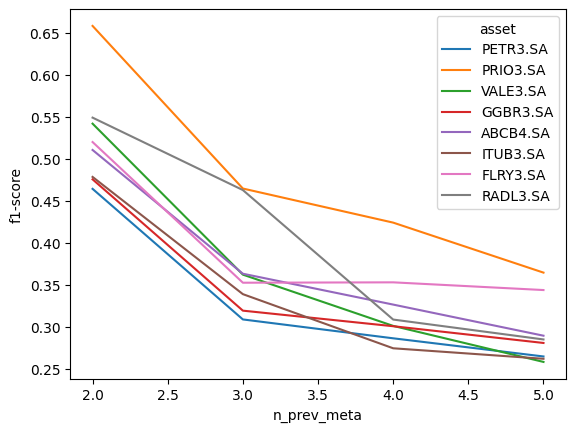

In [15]:
sns.lineplot(data=df_f1_macro, x="n_prev_meta", y="f1-score", hue="asset")